In [1]:
# Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Load Dataset
df = pd.read_csv("C:\\Users\\saine\\Downloads\\Zaalima Internship\\Project_1\\Synthetic Data.csv")

In [3]:
# Basic Analysis

In [4]:
print("Shape of data:", df.shape)

Shape of data: (500, 8)


In [5]:
print("\nColumn Names:")
print(df.columns.tolist())


Column Names:
['TaskID', 'Title', 'Description', 'CreatedAt', 'DueDate', 'Assignee', 'Priority', 'Label']


In [6]:
print("\nData Types:")
print(df.dtypes)


Data Types:
TaskID          int64
Title          object
Description    object
CreatedAt      object
DueDate        object
Assignee       object
Priority       object
Label          object
dtype: object


In [7]:
print("\nFirst 3 Rows:")
print(df.head(3))


First 3 Rows:
   TaskID                                              Title  \
0       1       Deployment: Customizable reciprocal function   
1       2  Database Update: Quality-focused contextually-...   
2       3             Testing: Cross-group global time-frame   

                                         Description   CreatedAt     DueDate  \
0  Deployment task involves Action piece improve ...  2025-09-08  2025-10-25   
1  Database Update task involves Share she relate...  2025-08-23  2025-09-06   
2  Testing task involves Everybody life every soo...  2025-08-27  2025-10-12   

  Assignee Priority            Label  
0   Martin   Medium       Deployment  
1  Zachary   Medium  Database Update  
2   Edward   Medium          Testing  


In [8]:
# Missing Values
df.isnull().sum()

TaskID         0
Title          0
Description    0
CreatedAt      0
DueDate        0
Assignee       0
Priority       0
Label          0
dtype: int64

In [9]:
# Unique Values Per Column
for col in df.columns:
    print(f"{col}: {df[col].nunique()} unique values")

TaskID: 500 unique values
Title: 500 unique values
Description: 500 unique values
CreatedAt: 60 unique values
DueDate: 84 unique values
Assignee: 25 unique values
Priority: 3 unique values
Label: 20 unique values


In [10]:
# Duplicates
duplicate_count = df.duplicated().sum()
print(f"Duplicate rows: {duplicate_count}")


Duplicate rows: 0


In [11]:
# Date Columns Analysis
print("\n Date Columns Check")
date_cols = ["CreatedAt", "DueDate"]
for col in date_cols:
    try:
        df[col] = pd.to_datetime(df[col], errors='coerce')
        print(f"{col}: converted to datetime successfully")
    except Exception as e:
        print(f"{col}: could not convert - {e}")


 Date Columns Check
CreatedAt: converted to datetime successfully
DueDate: converted to datetime successfully


In [12]:
# Calculate Task Duration (in days)
if all(c in df.columns for c in ["CreatedAt", "DueDate"]):
    df["TaskDurationDays"] = (df["DueDate"] - df["CreatedAt"]).dt.days
    print("\nAverage Task Duration (days):", df["TaskDurationDays"].mean())
    print("Minimum Task Duration:", df["TaskDurationDays"].min())
    print("Maximum Task Duration:", df["TaskDurationDays"].max())


Average Task Duration (days): 29.746
Minimum Task Duration: 0
Maximum Task Duration: 86


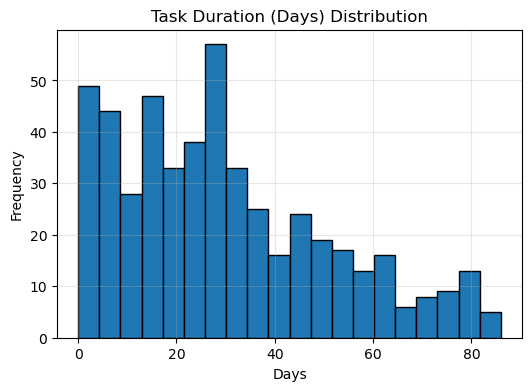

In [13]:
# Plot Task Duration Distributiom 
plt.figure(figsize=(6,4))
plt.hist(df["TaskDurationDays"].dropna(), bins=20, edgecolor='black')
plt.title("Task Duration (Days) Distribution")
plt.xlabel("Days")
plt.ylabel("Frequency")
plt.grid(True, alpha=0.3)
plt.show()

In [14]:
# Text Column Lengths (for Description, Title)
print("\n Text Column Length Stats")
text_cols = ["Title", "Description"]
for col in text_cols:
    if col in df.columns:
        df[f"{col}_length"] = df[col].astype(str).apply(len)
        print(f"{col}:")
        print(f"  Average length: {df[f'{col}_length'].mean():.2f}")
        print(f"  Max length: {df[f'{col}_length'].max()}")
        print(f"  Min length: {df[f'{col}_length'].min()}")


 Text Column Length Stats
Title:
  Average length: 46.05
  Max length: 67
  Min length: 28
Description:
  Average length: 88.01
  Max length: 138
  Min length: 53


In [15]:
# Categorical Analysis (Priority, Label, Assignee)
print("\n Categorical Summary")
categorical_cols = ["Assignee", "Priority", "Label"]
for col in categorical_cols:
    if col in df.columns:
        print(f"\nColumn: {col}")
        print(df[col].value_counts(dropna=False).head(10))


 Categorical Summary

Column: Assignee
Assignee
Laura          27
Lindsey        25
Jeffrey        25
Christopher    25
Annette        25
Jason          25
Natalie        24
David          23
Jorge          23
Sandra         23
Name: count, dtype: int64

Column: Priority
Priority
Medium    252
High      152
Low        96
Name: count, dtype: int64

Column: Label
Label
Backend Task                42
Design                      35
Testing                     31
Improvement                 30
Security                    29
Performance Optimization    28
Documentation               27
DevOps                      26
Meeting                     26
Client Call                 25
Name: count, dtype: int64


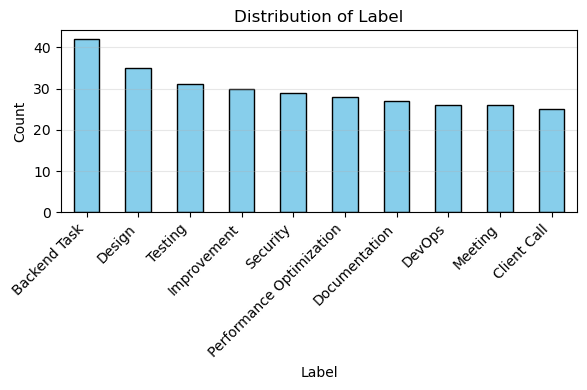

In [16]:
# Plot categorical distribution
plt.figure(figsize=(6,4))
df[col].value_counts().head(10).plot(kind='bar', color='skyblue', edgecolor='black')
plt.title(f"Distribution of {col}")        
plt.xlabel(col)
plt.ylabel("Count")
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()


 CORRELATION HEATMAP 
                      TaskID  TaskDurationDays  Title_length  \
TaskID              1.000000         -0.036312     -0.017958   
TaskDurationDays   -0.036312          1.000000     -0.067846   
Title_length       -0.017958         -0.067846      1.000000   
Description_length -0.009094         -0.028687      0.179490   

                    Description_length  
TaskID                       -0.009094  
TaskDurationDays             -0.028687  
Title_length                  0.179490  
Description_length            1.000000  


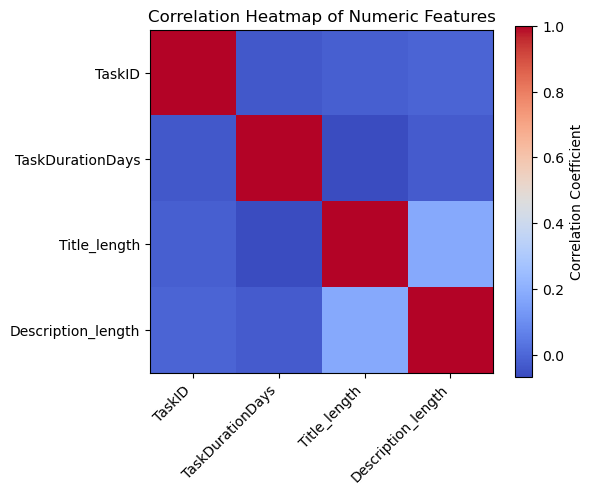

In [17]:
# Correlation Heatmap 
print("\n CORRELATION HEATMAP ")
numeric_cols = df.select_dtypes(include=np.number).columns.tolist()

if len(numeric_cols) > 1:
    corr_matrix = df[numeric_cols].corr(numeric_only=True)
    print(corr_matrix)

    plt.figure(figsize=(6,5))
    plt.imshow(corr_matrix, cmap="coolwarm", interpolation="nearest")
    plt.colorbar(label="Correlation Coefficient")
    plt.xticks(ticks=range(len(numeric_cols)), labels=numeric_cols, rotation=45, ha="right")
    plt.yticks(ticks=range(len(numeric_cols)), labels=numeric_cols)
    plt.title("Correlation Heatmap of Numeric Features")
    plt.tight_layout()
    plt.show()
